<a href="https://www.kaggle.com/code/darshanprabhu09/n2-titans-in-graphs-exploring-the-time-series?scriptVersionId=132977639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="padding: 10px; background-color:  #FF4500
          ; margin: 0; color:  ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> STEP -1 <br> IMPORTING LIBRARIES. </p>
          
          
## <span style="color: #FF4500;"> IMPORTING LIBRARIES </span>

In [1]:
# For data manupilation use pandas.
import pandas as pd

# For Arrays and other data structures use numpy.
import numpy as np

# For visualizations use Matplotlib.
import matplotlib.pyplot as plt

# For visualizations as well. 
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<p style="padding: 10px; background-color:  #FF4500
          ; margin: 0; color:  ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> STEP - 2<br> DATA COLLECTION. </p>
          
          
## <span style="color: #FF4500;"> COLLECTING ESSENTIAL DATA.
</span>

In [2]:
path='/kaggle/input/stock-prices-for'
# combining all the datasets into one list . 

# Defining the "company_list" as the list containing all the files.
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

In [3]:
# Define a blank dataframe
all_data = pd.DataFrame()

# Using a for loop to read all files into the "current_df".
for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
    
# Checking the data :    
all_data

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,1445.0000,1459.8800,1385.1400,1390.0000,9113808,AMZN
1255,2018-02-02,1477.3900,1498.0000,1414.0000,1429.9500,11125722,AMZN
1256,2018-02-05,1402.6200,1458.9800,1320.7200,1390.0000,11494985,AMZN
1257,2018-02-06,1361.4600,1443.9900,1351.7900,1442.8400,11066819,AMZN


<p style="padding: 10px; background-color:  #FF4500
          ; margin: 0; color:  ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> STEP - 3 <br> EXPLORATORY DATA ANALYSIS. </p>
          
          
## <span style="color: #FF4500;"> Lets explore the data with Dora 
</span>

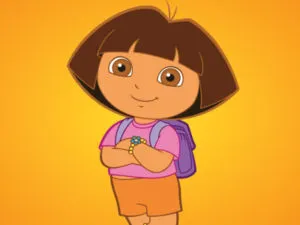

## <span style="color: #FF4500;"> 3.1 -  Shape is used to retrieve the number of columns and rows in the dataframe.


In [4]:
all_data.shape

(4752, 7)

## <span style="color: #FF4500;"> 3.2 -  Head is used to retrieve the first five rows in the dataframe.


In [5]:
all_data.head() 

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## <span style="color: #FF4500;"> 3.3 -  dtypes is used to retrieve the type of data in each columns .

In [6]:
all_data.dtypes 

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

## <span style="color: #FF4500;"> 3.4 -  tail is used to retrieve the last five rows of dataframe .

In [7]:
all_data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
1258,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


## <span style="color: #FF4500;"> 3.5 -  .isnull is used to retrieve the missing values ( FALSE = values are not missing , TRUE = values are missing).

In [8]:
all_data.isnull()

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1254,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,False


## <span style="color: #FF4500;"> 3.6 -  dtypes is used to retrieve the number of unique values in each columns .

In [9]:
all_data.nunique()

date      1259
open      4431
high      4459
low       4470
close     4472
volume    4752
Name         4
dtype: int64

<p style="padding: 10px; background-color:  #FF4500
          ; margin: 0; color:  ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> STEP - 4 <br> DATA PREPARATION. </p>
          
          
## <span style="color: #FF4500;"> Lets prepare the data. 
</span>



In [10]:
#converting the data to proper date and time format using to_datetime function.
all_data['date'] == pd.to_datetime(all_data["date"]) 

0       True
1       True
2       True
3       True
4       True
        ... 
1254    True
1255    True
1256    True
1257    True
1258    True
Name: date, Length: 4752, dtype: bool

In [11]:
#verifying values
all_data.date[0] 

0    2013-02-08
0    2014-03-27
0    2013-02-08
0    2013-02-08
Name: date, dtype: object

In [12]:
#printing all the column headers.
all_data.columns 

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

<p style="padding: 10px; background-color:  #FF4500
          ; margin: 0; color:  ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> STEP - 5 <br> DATA VISUALIZATON. </p>
          
          
## <span style="color: #FF4500;"> 5.1 - Lets visualize the data. 
</span>



(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

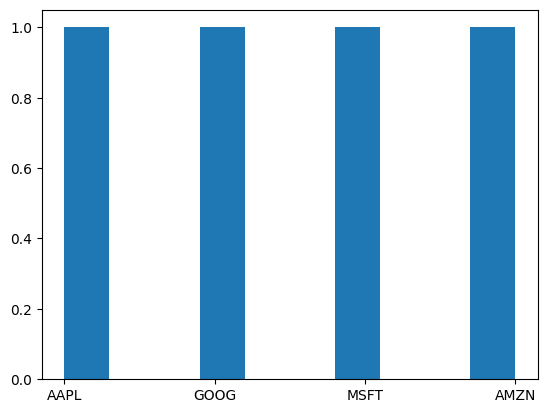

In [13]:
#retrieving all unique name of stocks into a array "tech_list".
tech_list = all_data['Name'].unique() 
plt.hist(tech_list)

## <span style="color: #FF4500;"> 5.2 - Plotting the "Opening prices" and "Closing price" of stocks.
</span>

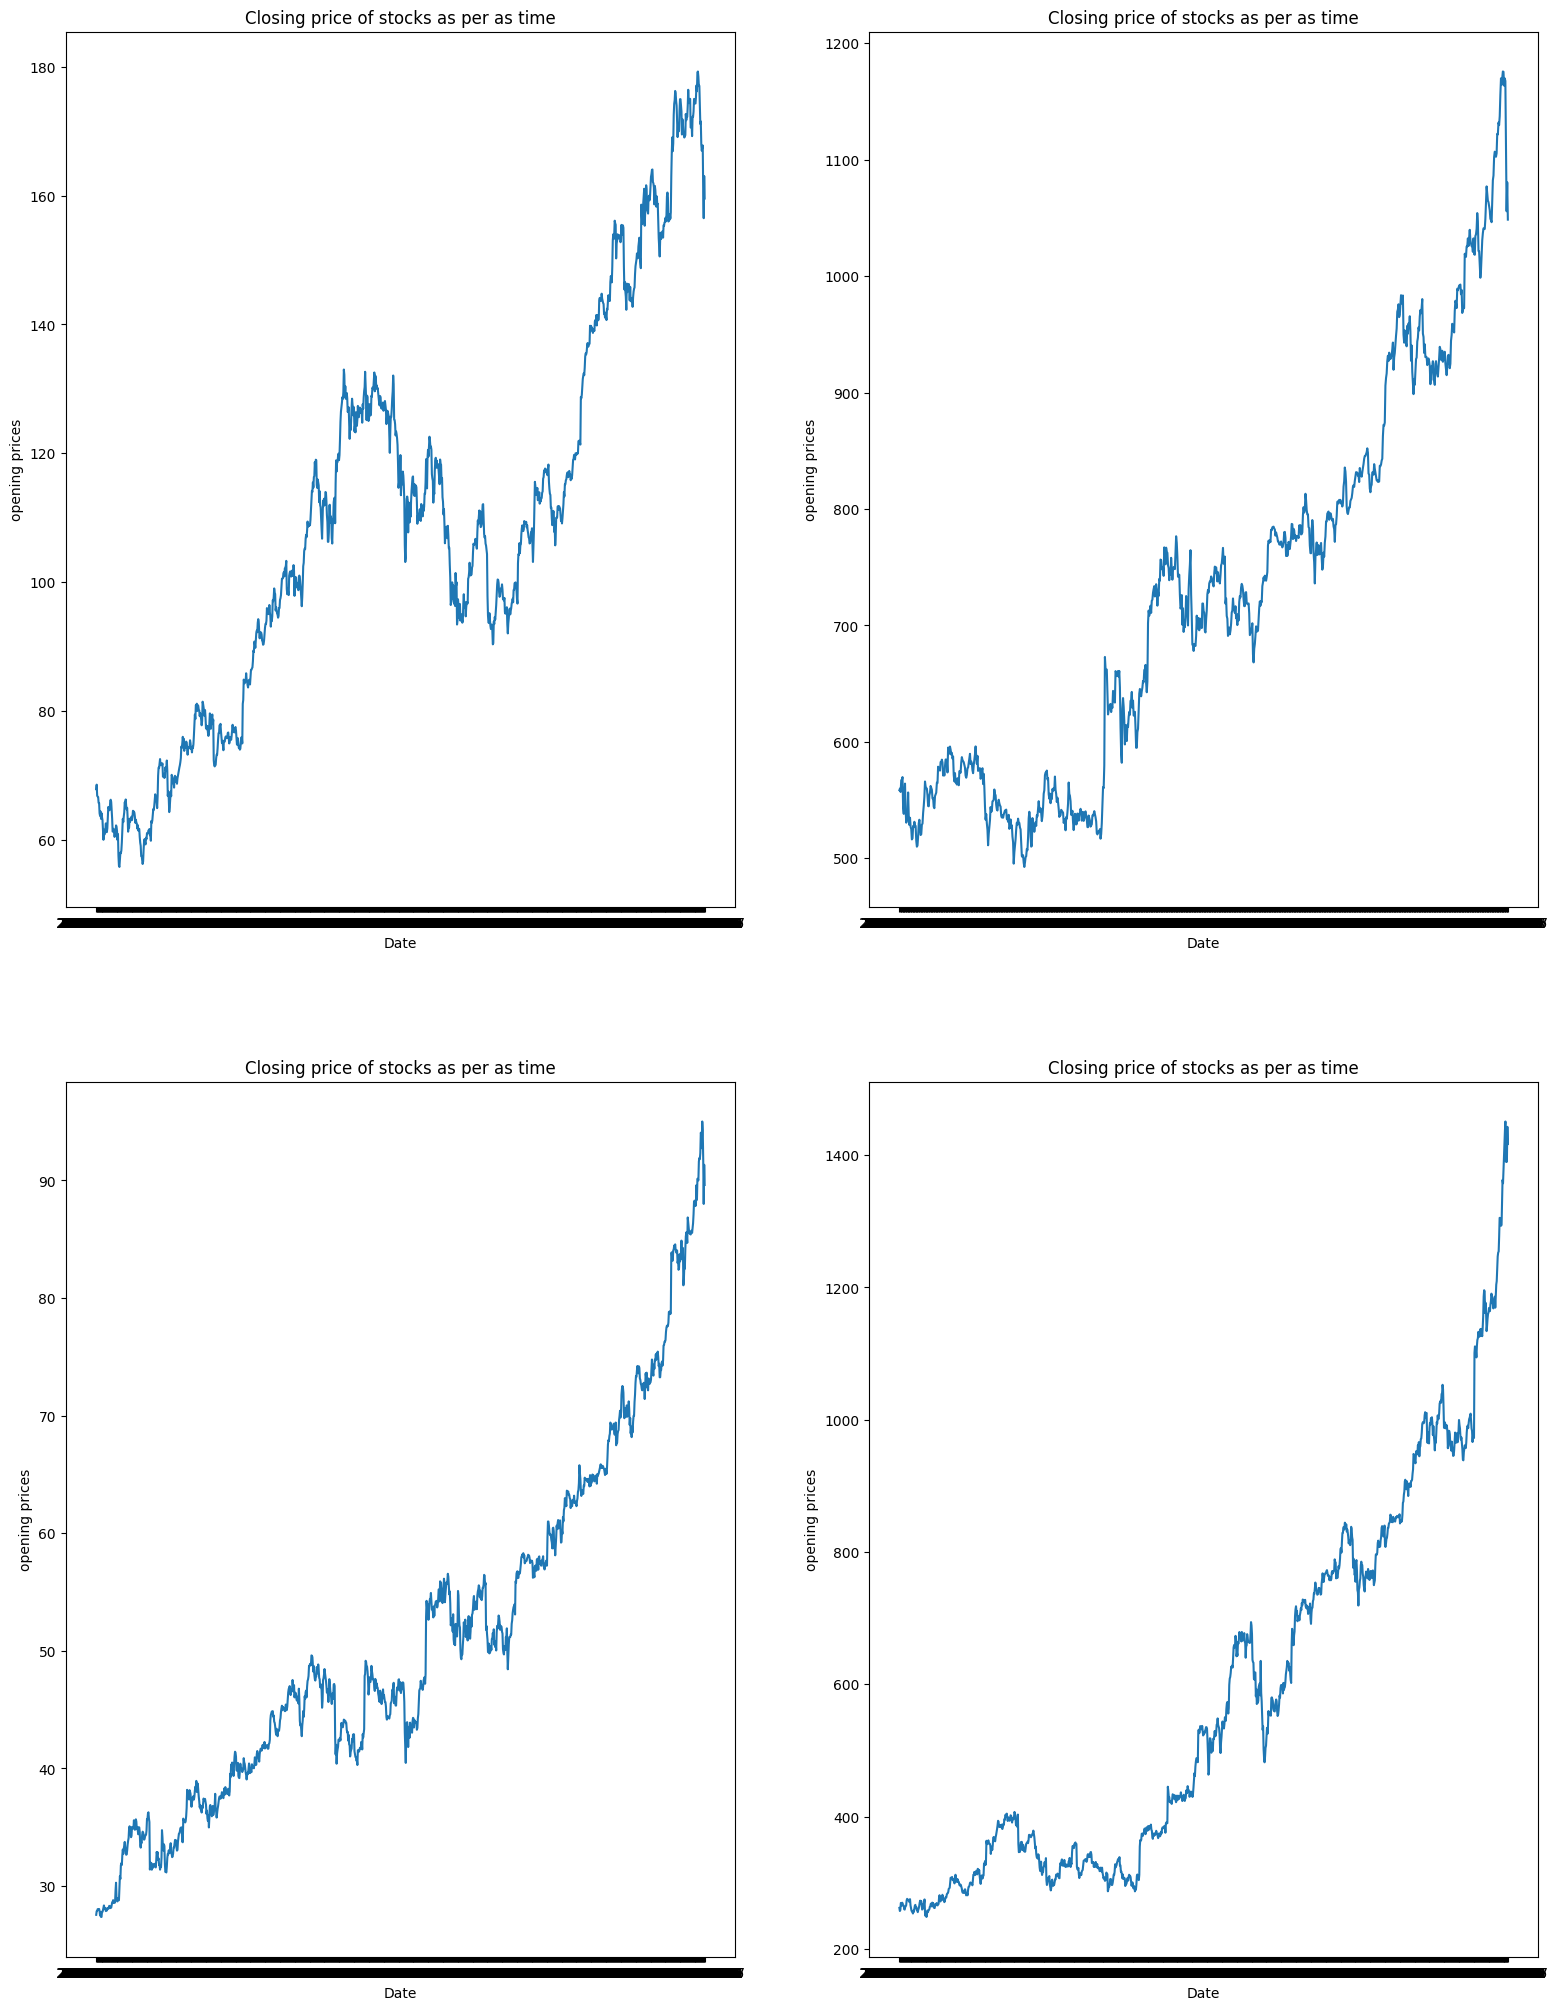

In [14]:
plt.figure(figsize=(19,25))

for i , company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data["Name"] == company]
    plt.plot(df['date'],df['close'])
    plt.xlabel("Date")
    plt.ylabel("opening prices")
    plt.title("Closing price of stocks as per as time")

## <span style="color: #FF4500;">5.3 - Plotting the  amount of volume been traded everyday..
</span>

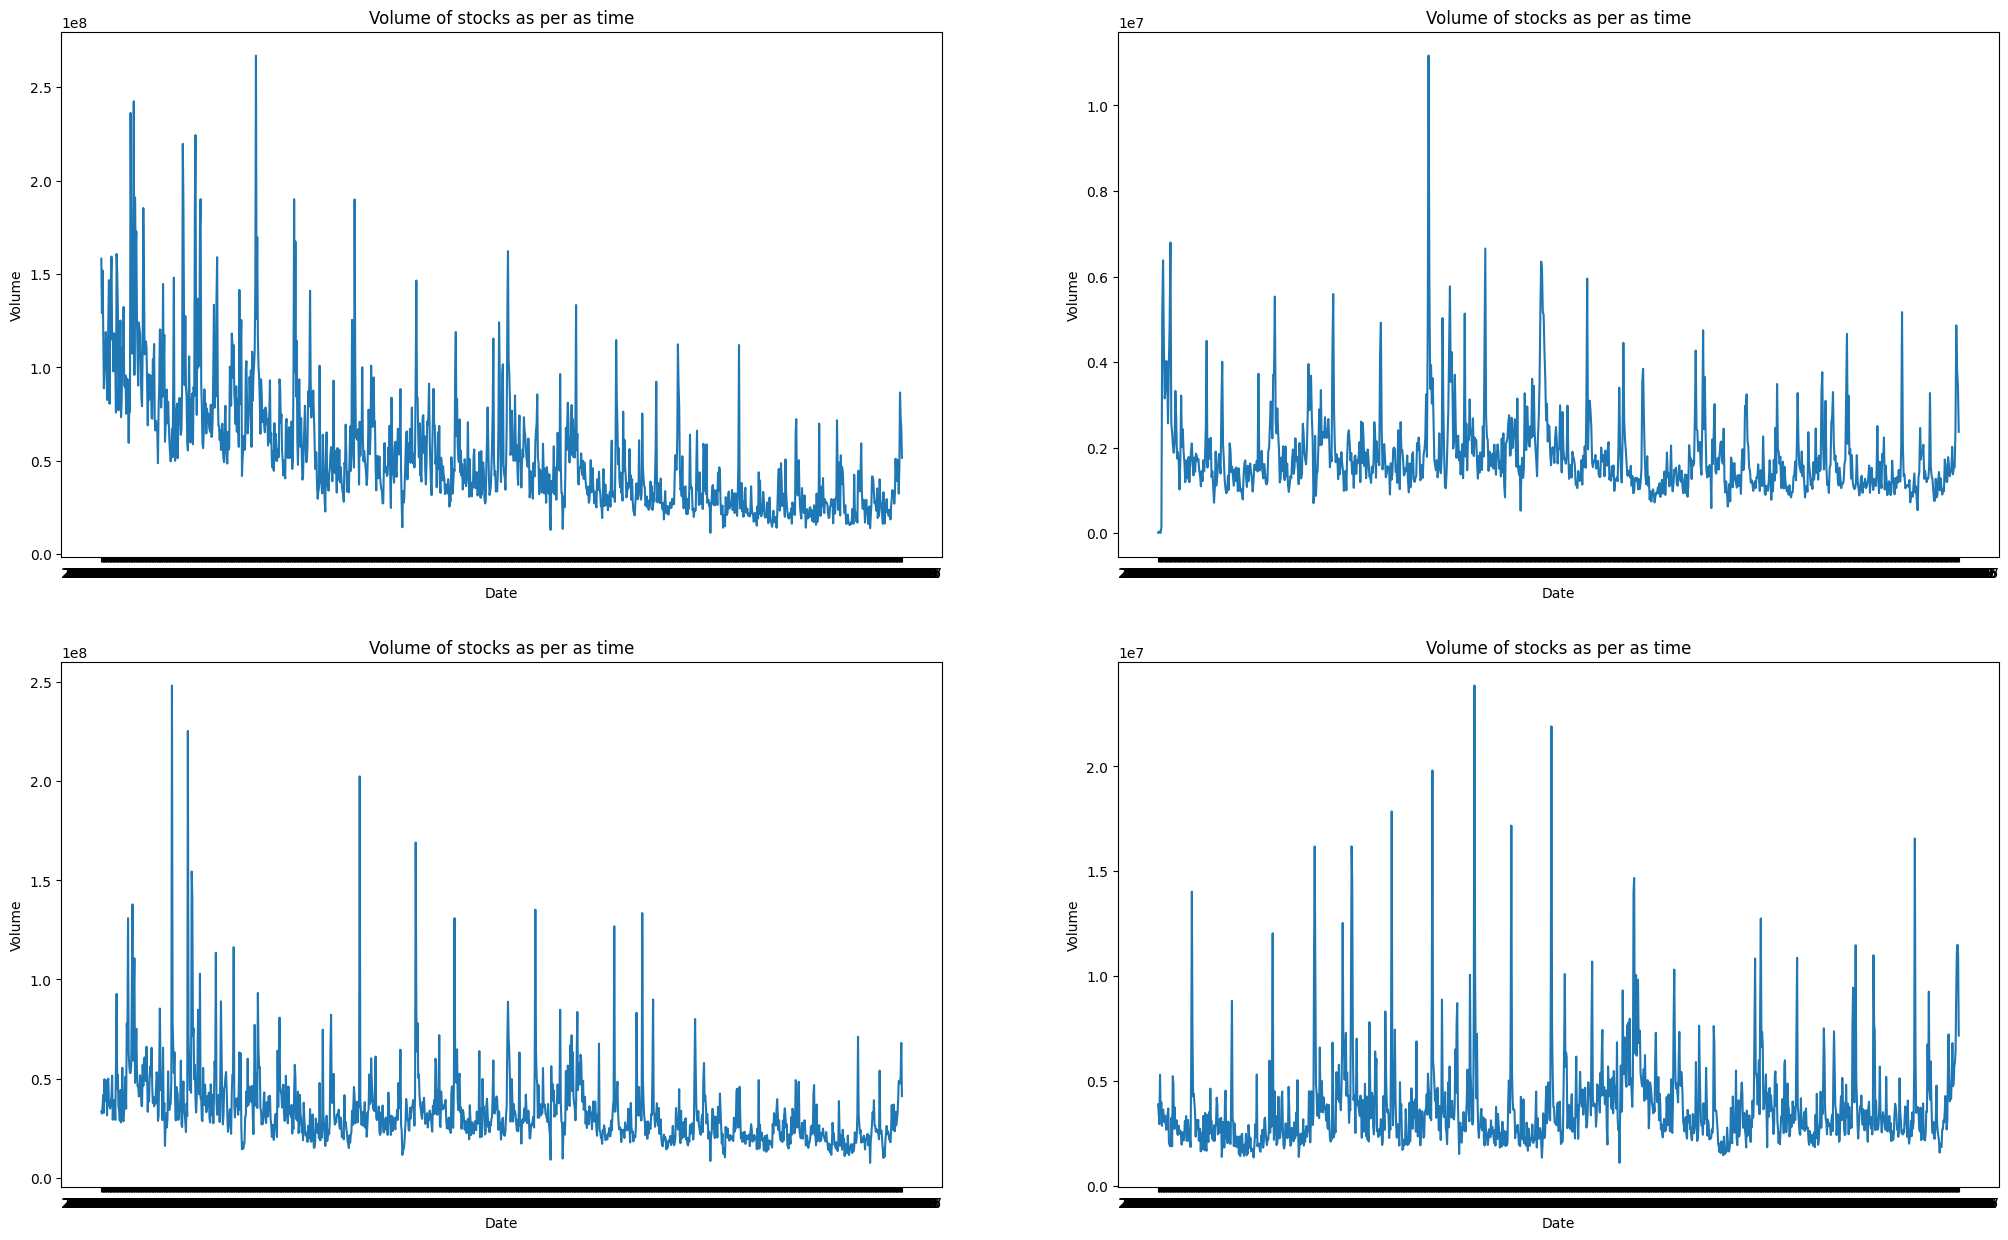

In [15]:
plt.figure(figsize = (25,15))

for i ,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name'] == company]
    plt.plot(df["date"],df["volume"])
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.title("Volume of stocks as per as time")
    

## <span style="color: #FF4500;"> -Using plotly to visualize data- 

In [16]:
#importing plotly to visualize data more better.
import plotly.express as px

## <span style="color: orange;"> You can zoom in and out in the graph drawn below.

In [17]:
for company in (tech_list):
    df = all_data[all_data['Name'] == company]
    graph =  px.line(df , x = "date", y = "volume" , title = "company")
    graph.show()

<p style="padding: 10px; background-color:  #FF4500
          ; margin: 0; color:  ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> STEP - 6 <br> INDIVIDUAL STOCK ANALYSIS. </p>
          
          
## <span style="color: #FF4500;"> 6.1 - Analyse the daily changes in the price of Stock : 
</span> 

Daily Stock Return Formula :
To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [18]:
# calculationg for the Google stock : 

df = pd.read_csv("/kaggle/input/stock-prices-for/GOOG_data.csv")


# Hope google gets impressed by this :)

## <span style="color: #FF4500;"> 6.2 - Exploratory data analysis on the individual google stock

In [19]:
# Prints the first five columns.
df.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [20]:
# Difference in terms of percentage and appending it to the existing Df : 
df['1 day % return'] = ((df['close'] - df['open'] / df['close'])) * 100

In [21]:
# checking whether the column we added exists or not . 

df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1 day % return'],
      dtype='object')

In [22]:
# checking the appended columns value 
df['1 day % return']

0       55744.291731
1       55898.783925
2       55595.218935
3       56617.489879
4       56600.334039
           ...      
970    116670.435900
971    111089.091645
972    105476.703921
973    107964.943550
974    104754.856701
Name: 1 day % return, Length: 975, dtype: float64

In [23]:
# Plotting everyday change in prices using plotly.

import plotly.express as px

fig = px.line(df , x = "date" , y = "1 day % return" , title = 'Changes in prices everyday for the Google stocks')
fig.show()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2016-10-20'),
  Text(0.0, 0, '2016-01-04'),
  Text(50.0, 0, '2016-03-16'),
  Text(100.0, 0, '2016-05-26'),
  Text(150.0, 0, '2016-08-08'),
  Text(200.0, 0, '2016-10-18'),
  Text(250.0, 0, '2016-12-29'),
  Text(300.0, 0, '')])

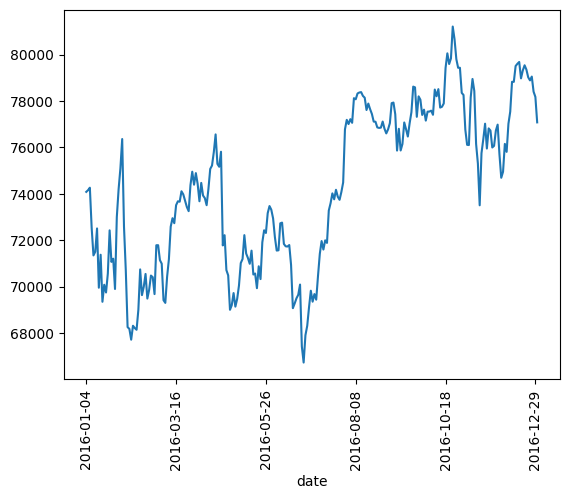

In [24]:
# checking values between 2016-01-01' to '2016-12-31

df.set_index("date")["2016-01-01":"2016-12-31"]["1 day % return"].plot()
plt.xticks(rotation = "vertical")
# rotating of the Graph . 

## <span style="color: #FF4500;"> 6.3 - Analysing the closing average on monthly basis : 

In [25]:
df2 = df.copy()
df2.columns
# creating a new dataframe to perform operations...

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1 day % return'],
      dtype='object')

In [26]:
df2 = df.copy()
df2['date']=pd.to_datetime(df2['date'])
df2.set_index('date',inplace=True)
df2.head()

,open,high,low,close,volume,Name,1 day % return
date,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,55744.291731
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,55898.783925
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,55595.218935
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,56617.489879
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,56600.334039


## <span style="color: #FF4500;"> 6.3.1 - Plotting closing value and opening value mean in monthly order : 

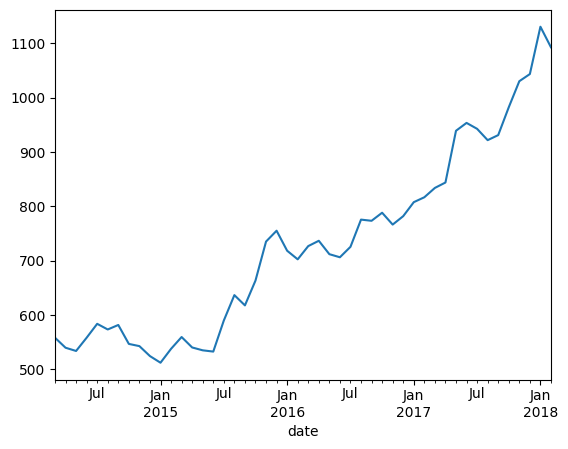

In [27]:
# plotting closing value in a monthly manner "M" represents the monthly manner: 

df2['close'].resample('M').mean().plot()
b = df2['close'].resample('M').mean()

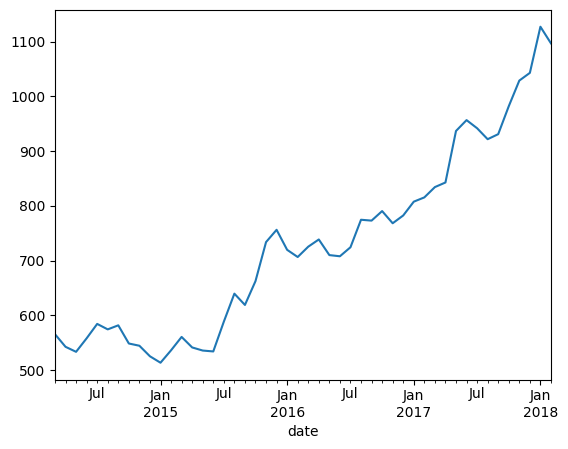

In [28]:
# Plotting opening value in monthly manner.
df2['open'].resample('M').mean().plot()
a = df2['open'].resample('M').mean()


## <span style="color: #FF4500;"> 6.4 -  Plotting closing and Open mean value in a yearly order 

<AxesSubplot: xlabel='date'>

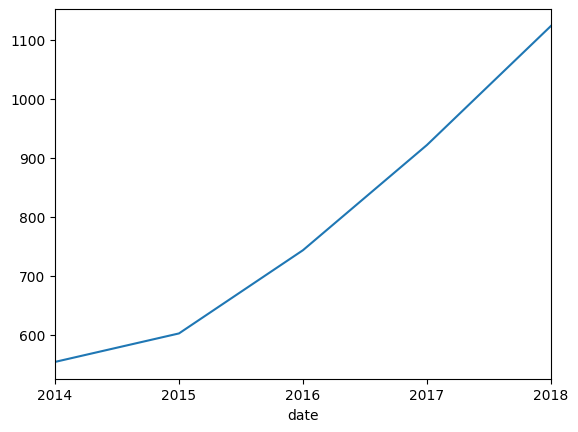

In [29]:
df2['close'].resample('Y').mean().plot()


<AxesSubplot: xlabel='date'>

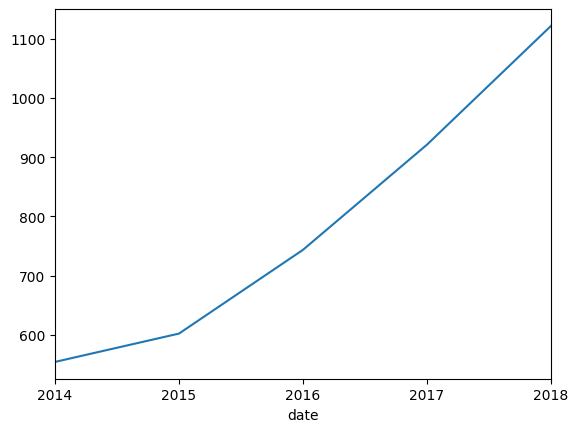

In [30]:
df2['open'].resample('Y').mean().plot()

<AxesSubplot: xlabel='date'>

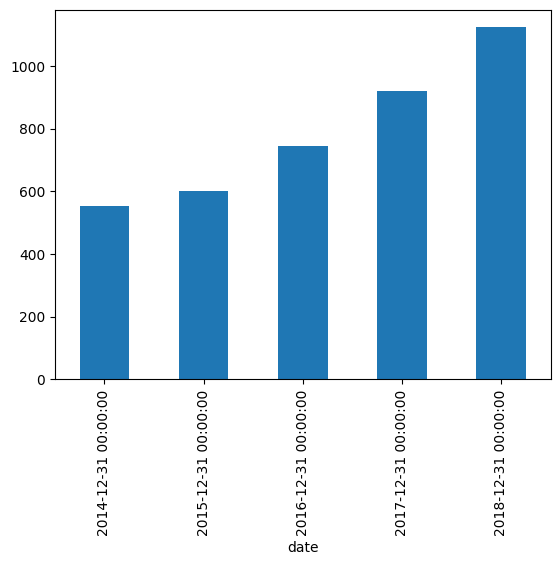

In [31]:
# plotting a histogram for closing monthly value of mean.


df2['close'].resample('Y').mean().plot(kind = 'bar')


<AxesSubplot: xlabel='date'>

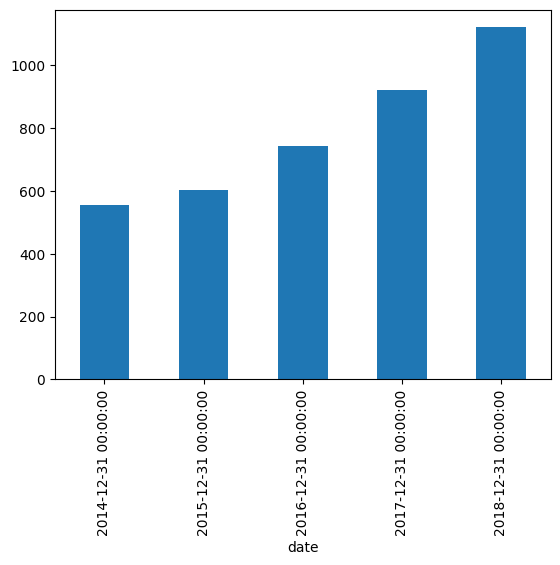

In [32]:
# plotting a histogram for opening monthly value of mean.


df2['open'].resample('Y').mean().plot(kind = 'bar')


# 5.) Checking the co-relation between all the stocks... 

In [33]:
df2.head()

,open,high,low,close,volume,Name,1 day % return
date,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,55744.291731
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,55898.783925
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,55595.218935
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,56617.489879
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,56600.334039


In [34]:
# Reading and creating indivicual dataframes for all stocks

apple = pd.read_csv("/kaggle/input/stock-prices-for/AAPL_data.csv")
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [35]:
microsoft = pd.read_csv("/kaggle/input/stock-prices-for/MSFT_data.csv")
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [36]:
google = pd.read_csv("/kaggle/input/stock-prices-for/GOOG_data.csv")
google.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [37]:
amazon = pd.read_csv("/kaggle/input/stock-prices-for/AMZN_data.csv")
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [38]:
# creating a dataframe that consists of all the closing values of all stocks : 

close = pd.DataFrame()

In [39]:
close['apple'] = apple['close']
close['amazon'] = amazon['close']
close['microsoft'] = microsoft['close']
close['google'] = google['close']

In [40]:
close.head()

,apple,amazon,microsoft,google
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


# Multi-Variate Analysis of the Various Tech Companies

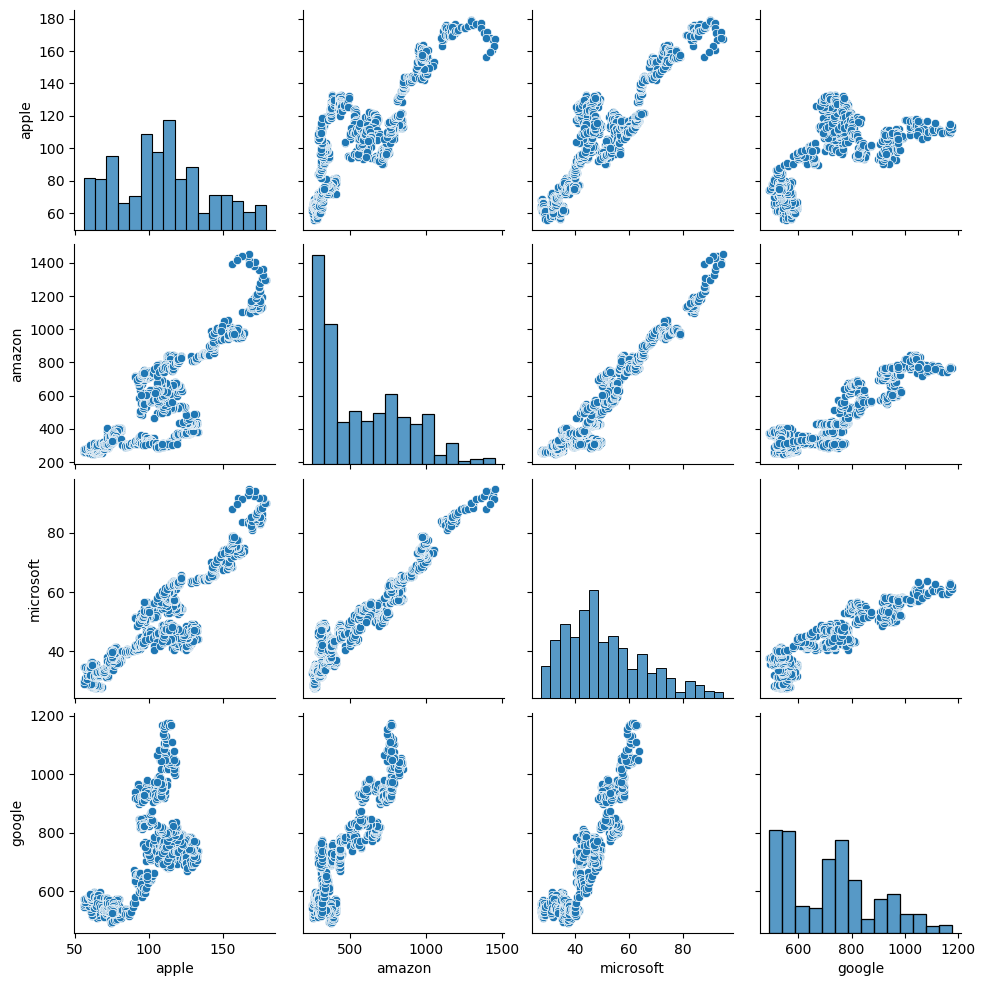

In [41]:
sns.pairplot(data = close)

<AxesSubplot: >

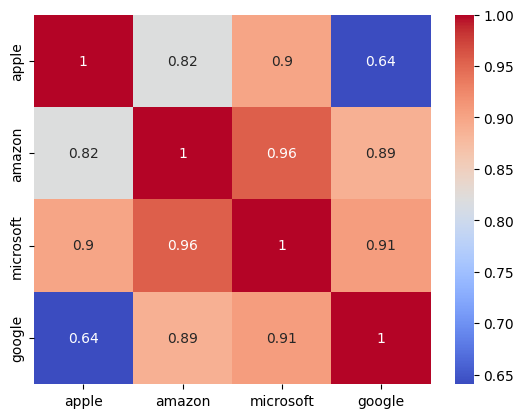

In [42]:
# Heatmap can be used to show correlation :

sns.heatmap(annot = True , data = close.corr() , cmap = 'coolwarm')

<h2> CONCLUSION : </h2>.

**From the above Heatmap we canc onclude that the stock prices for Amazon and Microsoft are very well related and close to each other.**

# 6.) Analysing the daily returns for each stock and finding the underlying correlation between the same.

In [43]:
ch_data = pd.DataFrame()

In [44]:
ch_data['apple_change'] = ((apple['close'] - apple['open']/apple['close'])*100)
ch_data['amazon_change'] = ((amazon['close'] - amazon['open']/amazon['close'])*100)
ch_data['microsoft_change'] = ((microsoft['close'] - microsoft['open']/microsoft['close'])*100)
ch_data['google_change'] = ((google['close'] - google['open']/google['close'])*100)

In [45]:
ch_data.head()


,apple_change,amazon_change,microsoft_change,google_change
0,6685.626325,26095.209964,2655.725953,55744.291731
1,6756.854688,25618.671164,2686.753769,55898.783925
2,6581.798656,25769.810591,2688.000000,55595.218935
3,6571.517131,26849.946525,2703.356761,56617.489879
4,6566.003624,26824.694548,2704.427960,56600.334039


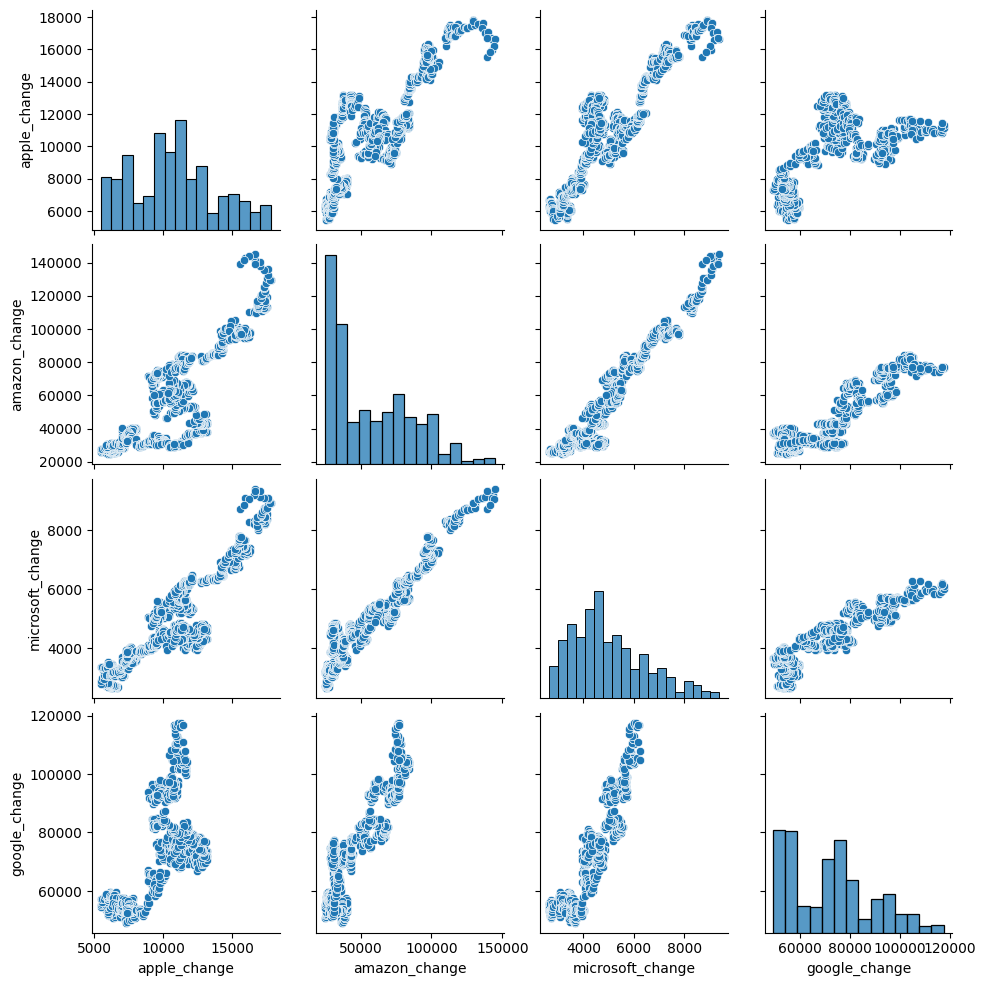

In [46]:
sns.pairplot(data=ch_data)

<AxesSubplot: >

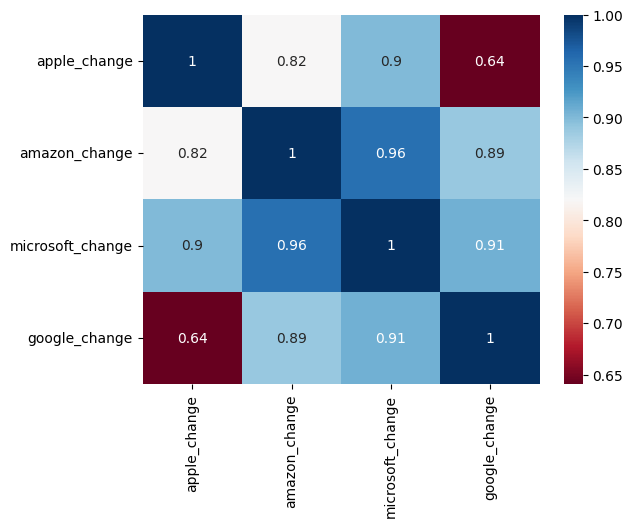

In [47]:
sns.heatmap(annot = True , data = ch_data.corr() , cmap = 'RdBu')

# Conclusion : 

As seen in the above heatmap we can conclude that Amazon and Micrososoft have the closest correlation when coming on changes.

# Thank you..
I hope this Kernel was worth iterating once and you gained a bit knowledge about the above metrics . I will appreciate your upvote as its gonna motivate more and Do share your reviews and help me to provide better Notebooks..

Thanking you in Anticipation....